In [2]:
import numpy as np
import matplotlib.pyplot as plt

Imagine you are trying to predict your annual income in the future based on how many years you stay in school. How might we go about trying to figure this out? One thing we could do is collect some data as shown below -- stay in school folks this is based on [real data](https://nces.ed.gov/programs/coe/indicator_cba.asp)!

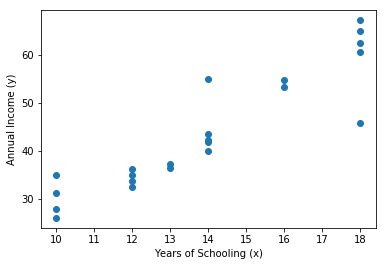

In [3]:
data = np.array([[10,27.9],[12,34.9],[13,36.3],[14,40],[16,54.7],[18,65],[10,31.2],[10,35.0],[10,26],[12,33.7],[12,32.4],[12,36.1],[13,37.3],[14,55],[14,42.2],[14,41.9],[14,43.5],[16,53.2],[18,67.2],[18,60.5],[18,62.4],[18,45.8]])
plt.scatter(data[:,0],data[:,1])
plt.xlabel('Years of Schooling (x)')
plt.ylabel('Annual Income (y)')
plt.show()

From the data we can tell visually that more school is correlated with more annual income (on average). But how can we predict what our income will be for any particular amount of years in school? One way we can do this is by trying to find some function $f_\theta$ that does a good job of predicting the annual income data $y$ from the years of schooling data $x$. The search for the optimal mapping is the regression problem and we call $\theta$ our model parameters.

Mathematically what we are doing is minimizing the error $y_i-f_{\theta}(x_i)$ for all data points $i$ in our data set. One very common model for doing this is to minimize sum of the squares of the error across all data points:
$$\min_{\theta} \sum_{i=0}^N (y_i-f_{\theta}(x_i))^2$$

In this way when we find the optimal value $\theta^*$ we will have come up with the best model $f_{\theta^*}$ for predicting $y$ from $x$. This process can be done for any function $f$ and any dimmension of data and parameters. For our example we are going to consider a linear function for $f$:

$$ \tilde{y} = \theta_1 * x + \theta_0$$ 

where $\tilde{y}$ is our predicted value of $y$. Since we are assuming a linear model for $f$, in our example this reduces to finding the straight line that comes the closest to all of the datapoints. So lets take a guess to get things started with the values: $\theta_0 = 20$ and $\theta_1 = 1$. With this rough guess we should hit in the middle of the first couple of points as $1*10+20 = 30$. Let's see how it looks:

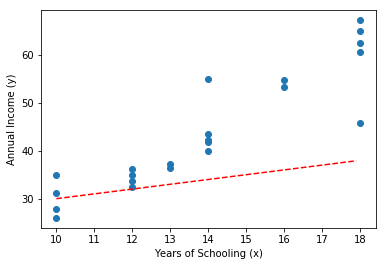

In [14]:
data = np.array([[10,27.9],[12,34.9],[13,36.3],[14,40],[16,54.7],[18,65],[10,31.2],[10,35.0],[10,26],[12,33.7],[12,32.4],[12,36.1],[13,37.3],[14,55],[14,42.2],[14,41.9],[14,43.5],[16,53.2],[18,67.2],[18,60.5],[18,62.4],[18,45.8]])
plt.scatter(data[:,0],data[:,1])
plt.xlabel('Years of Schooling (x)')
plt.ylabel('Annual Income (y)')

theta_0_guess = 20
theta_1_guess = 1

def f_theta(xi,theta_0,theta_1):
    return theta_1*xi + theta_0

x_for_line = np.arange(10.0, 18.0, 0.1)
y_for_line = f_theta(x_for_line,theta_0_guess,theta_1_guess)
plt.plot(x_for_line,y_for_line, 'r--')

plt.show()

It looks like our function predicts the first values well and then gets worse and worse. Remember we are trying to minimize the square error and hope for it to be near 0 but in this case we are far from the optimium.

In [25]:
def mse_f_theta(theta_0,theta_1,data):
    f_theta_func = lambda xi : f_theta(xi,theta_0,theta_1)
    error = 0
    for datapoint in data:
        error += (datapoint[1] - f_theta_func(datapoint[0]))**2
    return error

error = mse_f_theta(theta_0_guess,theta_1_guess,data)
print("Error is: ",error)

Error is:  4191.02


That is a **BIG** number -- so how can we improve it? 

Well since we are trying to solve a minimiziation problem we can leverage tools from the optimization litterature to help find an optimal value. Remeber what we are trying to solve is:
$$\min_{\theta} \sum_{i=0}^N (y_i-f_{\theta}(x_i))^2$$

In this example since $\theta$ is only two dimmensional (we are only searching for $\theta_0$ and $theta_1$ we can actually compute and plot the MSE coming from every choice of $\theta$!

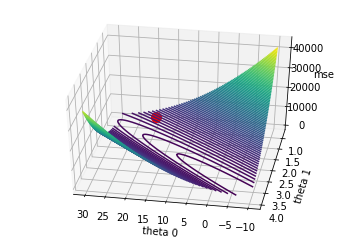

In [24]:
mse_f_theta_func = lambda theta_0, theta_1 : mse_f_theta(theta_0,theta_1,data)

theta_0s = np.arange(-10.0, 30.0, 0.05)
theta_1s = np.arange(0.8, 4, 0.05)
Theta_0s, Theta_1s = np.meshgrid(theta_0s, theta_1s)
MSEs = mse_f_theta_func(Theta_0s,Theta_1s)

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(Theta_0s, Theta_1s, MSEs, 100)

ax.set_xlabel('theta 0')
ax.set_ylabel('theta 1')
ax.set_zlabel('mse');

ax.scatter3D(theta_0_guess,theta_1_guess,error, s=100, c='r', marker='o')

ax.view_init(40, 100)

Here you can see that our initial guess actually isn't terrible in the grand scheme of things but definitely isn't at the minimum. So how can we move downhill toward the optimal value where the hill is at its flatest? It turns out we can use calculus and the idea of **gradient descent**. The gradient of a function $\nabla$ is the set of partial derivatives of the function with respect to its inputs and it turns out moving in the opposite direction of the gradient will move you toward the minimum. Therefore in our case we can compute the gradient of the MSE and move opposite that direction:
$$ MSE = \sum_{i=0}^N (y_i-f_{\theta}(x_i))^2$$
$$ MSE = \sum_{i=0}^N (y_i-\theta_1 x_i - \theta_0)^2$$
$$ \nabla MSE = \left[\frac{\partial MSE}{\partial \theta_0}, \frac{\partial MSE}{\partial \theta_1} \right] = \left[ \sum_{i=0}^N -2(y_i-\theta_1 x_i - \theta_0), \sum_{i=0}^N -2x_i(y_i-\theta_1 x_i - \theta_0)  \right]$$

In [17]:
def grad_f_theta(theta_0,theta_1,data):
    d1 = 0
    d0 = 0
    for datapoint in data:
        temp = -2*(datapoint[1] - theta_1*datapoint[0] - theta_0)
        d1 += datapoint[0]*temp
        d0 += temp
    return [d0,d1]

The next question you might ask is: "how much do I move in that direction?" And the answer is that generally in machine learning a specific value of $\alpha$ which is called the **learning rate** is used. This value is chosen by the programmer and needs to be tuned to the specific problem. As such this type of value is called a **hyper-parameter** as the whole algorithm is parameterized by it. In this case the update becomes:
$$ \theta = \theta - \alpha \nabla $$
Too high of a learning rate means that $\theta$ may overshoot the solution and possibly diverge. Too low of a learning rate will make the algorithm take a very very long time to reach the solution. Lets explore this below for our data. Note how sensitive the convergence can be to the learning rate!

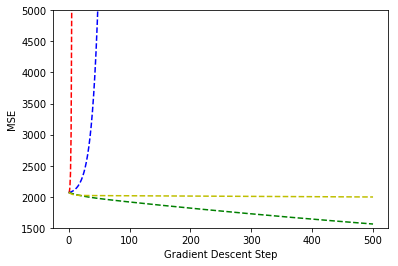

In [18]:
def gradientDescent(data, theta_0_guess, theta_1_guess, alpha = 0.1, convergence_tolerance = 1e-6, max_iter = 500):
    theta = np.array([theta_0_guess, theta_1_guess])
    mse = mse_f_theta(theta[0],theta[1],data)
    trace = [mse]
    for i in range(max_iter):
        nabla = np.array(grad_f_theta(theta[0],theta[1],data))
        theta = theta - alpha*nabla
        trace.append(mse)
        mse = mse_f_theta(theta[0],theta[1],data)
        if abs(trace[-1]-mse) < convergence_tolerance:
            break
    return theta, trace

theta_0003, trace_0003 = gradientDescent(data,30,1,0.0003)
theta_00023, trace_00023 = gradientDescent(data,30,1,0.00023)
theta_000222, trace_000222 = gradientDescent(data,30,1,0.000222)
theta_00001, trace_00001 = gradientDescent(data,30,1,0.00001)

plt.plot(range(len(trace_0003)),trace_0003, 'r--')
plt.plot(range(len(trace_00023)),trace_00023, 'b--')
plt.plot(range(len(trace_000222)),trace_000222, 'g--')
plt.plot(range(len(trace_00001)),trace_00001, 'y--')
plt.xlabel('Gradient Descent Step')
plt.ylabel('MSE')
plt.ylim(1500, 5000)
plt.show()

And we can note that our final theta values for our best converging approach are closer to the optimum and fit the data much better!

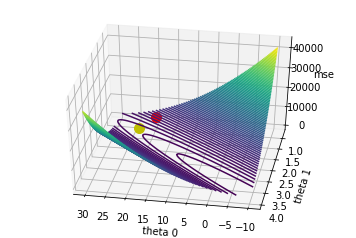

In [22]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(Theta_0s, Theta_1s, MSEs, 100)

ax.set_xlabel('theta 0')
ax.set_ylabel('theta 1')
ax.set_zlabel('mse');

ax.scatter3D(theta_0_guess,theta_1_guess,error, s=100, c='r', marker='o') # original point
ax.scatter3D(theta_000222[0],theta_000222[1],error, s=100, c='y', marker='o') # optimized point

ax.view_init(40, 100)

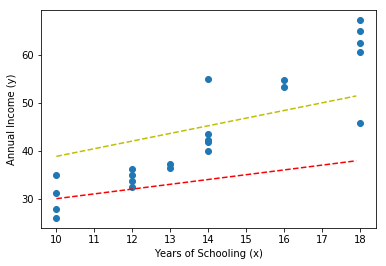

In [20]:
plt.scatter(data[:,0],data[:,1])
plt.xlabel('Years of Schooling (x)')
plt.ylabel('Annual Income (y)')
plt.plot(x_for_line,y_for_line, 'r--') # original line
y_for_line_000222 = f_theta(x_for_line,theta_000222[0],theta_000222[1])
plt.plot(x_for_line,y_for_line_000222, 'y--') # optimized line

plt.show()

It is also important to note that when the function we are minimizing is not convex (does not make a nice bowl shape) then gradient descent can at best find a local minimum and not a global minimum and therefore the initialization can be very important. Advanced machine learning techniques leverage a lot of tricks to try to avoid getting stuck in undesireable local minima and to converge to more globally optimal minima.

Now I know this all felt like a **TON** of work. And it was. The good news is most modern machine learning approaches are contained in software packages that remove the need for most of the manual code writing. Instead the task is to think about which algoirithm or approach to use, and how to set the hyperparameters. For example we could have done this linear regression example simply with the one line ```scipy``` command below AND it finds a better more converged solution! This shows the power and ease of modern machine learning libraries!

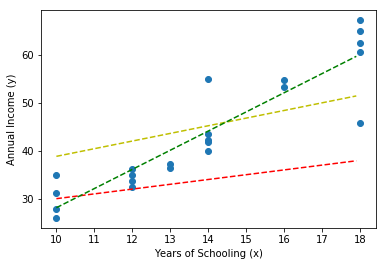

In [21]:
import scipy
from scipy.optimize import curve_fit
popt, pcov = curve_fit(f_theta, data[:,0], data[:,1], p0 = [theta_0_guess, theta_1_guess])

plt.scatter(data[:,0],data[:,1])
plt.xlabel('Years of Schooling (x)')
plt.ylabel('Annual Income (y)')
plt.plot(x_for_line,y_for_line, 'r--') # original line
plt.plot(x_for_line,y_for_line_000222, 'y--') # hand optimized line
plt.plot(x_for_line, f_theta(x_for_line, *popt), 'g--') # scipy line

plt.show()

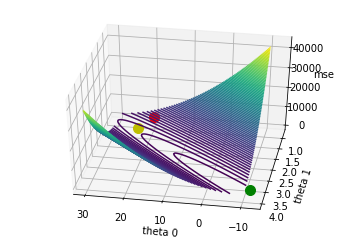

In [23]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(Theta_0s, Theta_1s, MSEs, 100)

ax.set_xlabel('theta 0')
ax.set_ylabel('theta 1')
ax.set_zlabel('mse');

ax.scatter3D(theta_0_guess,theta_1_guess,error, s=100, c='r', marker='o')
ax.scatter3D(theta_000222[0],theta_000222[1],error, s=100, c='y', marker='o')
ax.scatter3D(popt[0],popt[1],error, s=100, c='g', marker='o')

ax.view_init(40, 100)